In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Loading and preprocessing the dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# everything works better if data is normalized
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1,28,28,1)
numpixels = 28*28
imshape = x_train.shape[1:]

In [ ]:
x_train.shape

(60000, 28, 28, 1)

# Add uniform random noise to the images

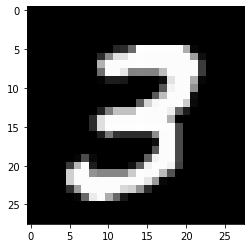

In [ ]:
es = x_train[7]
plt.imshow(X=es.reshape(28,28), cmap='gray')

In [ ]:
# Vogliamo solo alcune immagini "corrote" dal rumore, non da tutte 70% 30%
threshold = 0.7
# Train set
perturbed_pixels = np.random.uniform(size=x_train.shape) > threshold
noisy_x_train = x_train + np.random.uniform(size=x_train.shape)*perturbed_pixels
noisy_x_train = noisy_x_train.clip(0,1)

In [ ]:
# Test set
perturbed_pixels_test = np.random.uniform(size=x_test.shape) > threshold
noisy_x_test = x_test + np.random.uniform(size=x_test.shape)*perturbed_pixels_test
noisy_x_test = noisy_x_test.clip(0,1)

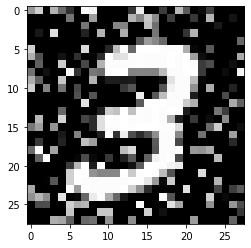

In [ ]:
es = noisy_x_train[7]
plt.imshow(X=es.reshape(28,28), cmap='gray')

# Build the model

You can experiment with different architecures. Here there is one that works fairly well.

- **Input**: ...

## Coding layers

- **Convolutional Layer 1**: 16 kernels, 3x3 kernel size, relu activation, padding same
- **Max pooling 2d**: pool size 2x2, padding same

- **Convolutional Layer 2**: 8 kernels, 3x3 kernel size, relu activation, padding same
- **Max pooling 2d**: pool size 2x2, padding same

- **Convolutional Layer 3**: 8 kernels, 3x3 kernel size, relu activation, padding same
- **Max pooling 2d**: pool size 2x2, padding same

## **h** representation

- The last layer of the coding layers is the **h** Layer

## Reconstruction layers

- **convolutional layer 1**: 8 kernels, 3x3, relu, padding same
- **upsampling layer**: 2x2

- **convolutional layer 2**: 8 kernels, 3x3, relu, padding same
- **upsampling layer**: 2x2

- **convolutional layer 3**: 16 kernels, 3x3, relu
- **upsampling layer**: 2x2

## Output layer

- **convolutional layer*: 1 kernel, 3x3, activation sigmoid, padding same


In [ ]:
hsize = 8
input_shape = (28, 28, 1)
input = keras.Input(shape=input_shape, name="input")

# coding layers
x = Conv2D(filters=16, kernel_size=(3,3), activation="relu", padding="same", name="conv2d_1")(input)
x = MaxPool2D(pool_size=(2,2), padding="same", name="maxPool_1")(x)
x = Conv2D(filters=8, kernel_size=(3,3), activation="relu", padding="same", name="conv2d_2")(x)
x = MaxPool2D(pool_size=(2,2), padding="same", name="maxPool_2")(x)
x = Conv2D(filters=8, kernel_size=(3,3), activation="relu", padding="same", name="conv2d_3")(x)
# x = MaxPool2D(pool_size=(2,2), padding="same", name="maxPool_3")(x)

# h representation
# Core
h = Dense(hsize, activation="linear", name="h")(x)
# -----

# reconstruction layers
x = Conv2D(filters=8, kernel_size=(3,3), activation="relu", padding="same", name="conv2d_r_1")(h)
x = UpSampling2D(size=(2,2), name="upSample_1")(x)
x = Conv2D(filters=8, kernel_size=(3,3), activation="relu", padding="same", name="conv2d_r_2")(x)
x = UpSampling2D(size=(2,2), name="upSample_2")(x)
x = Conv2D(filters=16, kernel_size=(3,3), activation="relu", padding="same", name="conv2d_r_3")(x)
# x = UpSampling2D(size=(2,2))(x)

# Output layer
output = Conv2D(filters=1, kernel_size=3, activation="relu", padding="same", name="conv_out")(x)

model = keras.Model(input, output)

In [ ]:
model.compile(loss="binary_crossentropy")
model.summary()

Model: "functional_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
maxPool_1 (MaxPooling2D)     (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
maxPool_2 (MaxPooling2D)     (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
h (Dense)                    (None, 7, 7, 8)         

In [ ]:
model.fit(noisy_x_train, x_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0889
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0891
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0888
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0885
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0884
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0878
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0882
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0885
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0889
Epoch 11/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0892
Epoch 12/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0881
E

In [ ]:
ds = noisy_x_test
preds = model.predict(ds)

# Plot results

In [ ]:

def plot_imgs_grid(images):
    plt.figure(figsize=(30,10))
    plt.gray()

    for i in range(50):
        ax = plt.subplot(5,10,i+1)
        ax.imshow(images[i].reshape(28,28))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

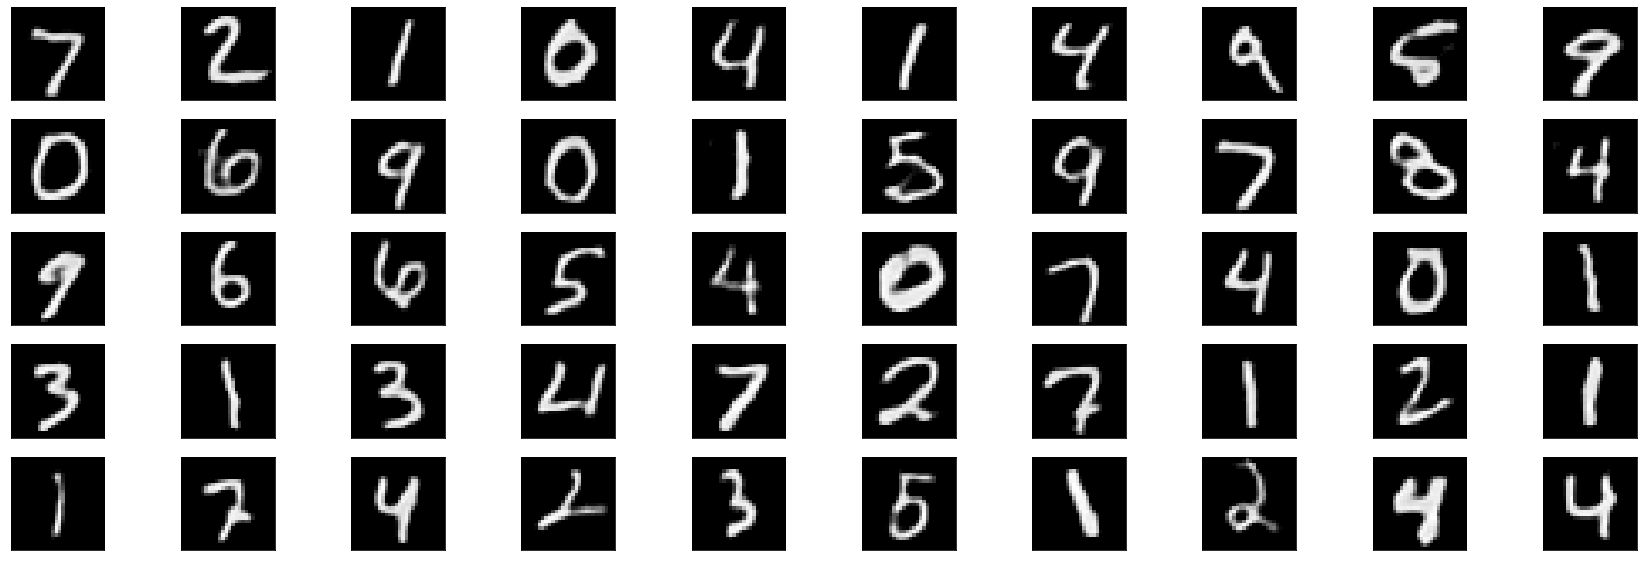

In [ ]:
plot_imgs_grid(preds)

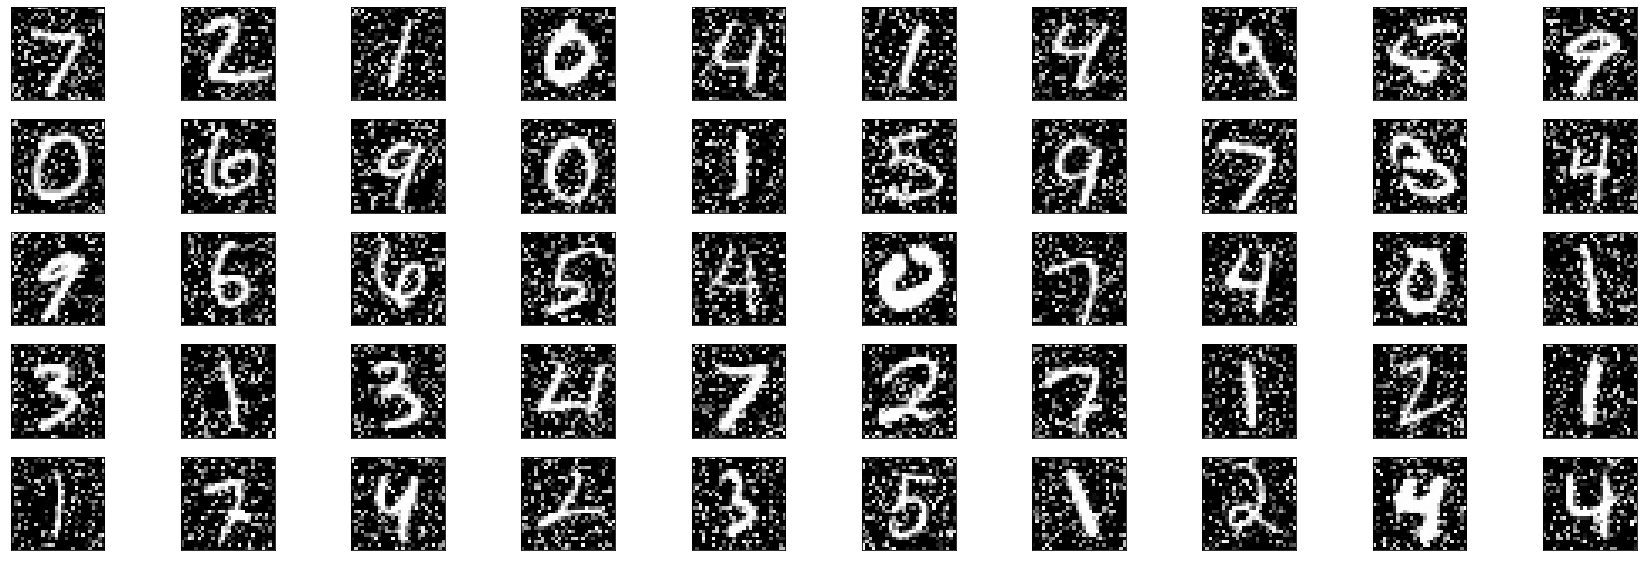

In [ ]:
plot_imgs_grid(ds)